



# Project 2: TMDB 5000 Movie Dataset





<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 
 We will Load datasets `tmdb-movies.csv` [TMDb movie data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.)

| Attribute             |                                                        
| --------------------- |
| popularity            |                                                     
| budget                |                                                           
| revenue               |                                                             
| original_title        |                                                         
| cast                  |                                                           
| homepage              |                                                         
| director              |                                                         
| tagline               |                                                           
| keywords              |                                                         
| overview              |                                                         
| runtime               |                                                           
| genres                |                                                         
| production_companies  |                                                         
| release_date          |                                                           
| vote_count            |                                                         
| vote_average          |                                                         
| release_year          |                                                           
|  budget_adj           |                                                         
|  revenue_adj          |                                                         
 

### Questions for Analysis

- Which genres are most popular from year to year?

- What kinds of properties are associated with movies that have high revenues?

 will address these questions in the data analysis and conclusion sections

 We will use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries


## Data Wrangling


In [101]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


We will Load the data and print out a few lines.

In [102]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We will check the tuple of the dimensions of the dataframe.

In [103]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

We will check this returns the datatypes of the columns.

In [104]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We will display a concise summary of the dataframe.

In [105]:
# this displays a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We will check the number of nulls in each column.

In [106]:
# number of nulls in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

We will Drop features that aren't relevant to our questions and drop rows with any null values in datasets and print out a few lines.

In [107]:
# drop columns from tmdb-movies dataset
df.drop(['imdb_id','homepage', 'director', 'keywords', 'overview','production_companies','tagline'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The rows containing null values might need to be removed for more accurate results.

In [108]:
# drop rows with any null values in datasets
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 14 columns):
id                10768 non-null int64
popularity        10768 non-null float64
budget            10768 non-null int64
revenue           10768 non-null int64
original_title    10768 non-null object
cast              10768 non-null object
runtime           10768 non-null int64
genres            10768 non-null object
release_date      10768 non-null object
vote_count        10768 non-null int64
vote_average      10768 non-null float64
release_year      10768 non-null int64
budget_adj        10768 non-null float64
revenue_adj       10768 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


We will check for duplicates in the data. 

In [109]:
# check for duplicates in the data
sum(df.duplicated())

1

We will drop duplicates.

In [110]:
# drop duplicates
df.drop_duplicates(inplace=True)

We will check to confirm the correction by rechecking for duplicates in the data. 

In [111]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

We will check the number of nulls in each column.

In [112]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

We trimmed and cleaned data, and we are ready to move on to Exploratory Data Analysis

## Exploratory Data Analysis

In [113]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10767.000000,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,1.076700e+04,1.076700e+04
mean,65477.144144,0.650924,1.475532e+07,4.018610e+07,102.413393,219.137364,5.967549,2001.283459,1.770705e+07,5.183338e+07
std,91703.303390,1.003565,3.102387e+07,1.174783e+08,30.906009,577.964702,0.931426,12.815909,3.442339e+07,1.452125e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10559.500000,0.209957,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20423.000000,0.386062,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74507.500000,0.719253,1.600000e+07,2.476490e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.432264e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


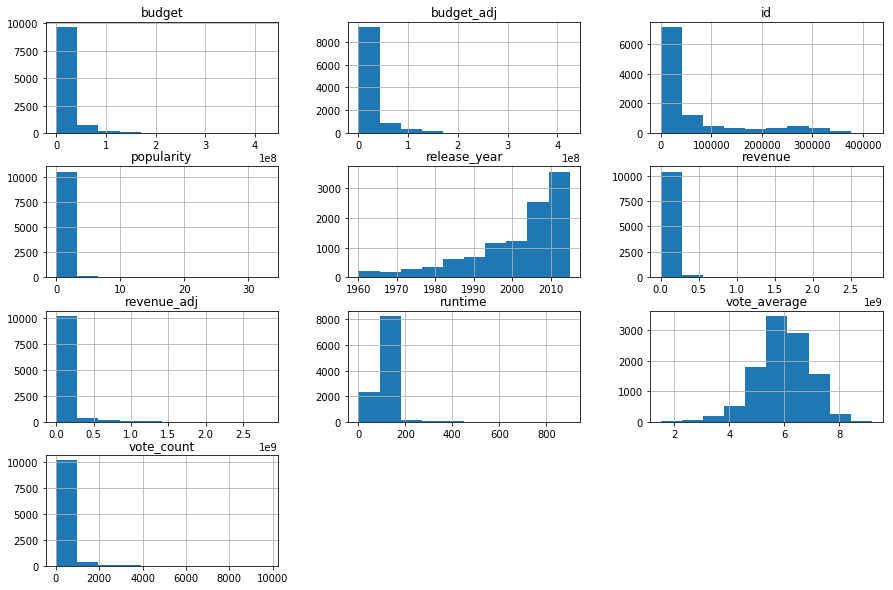

In [114]:
# plot distribution of tmdb-movies dataset
df.hist(figsize=(15,10));

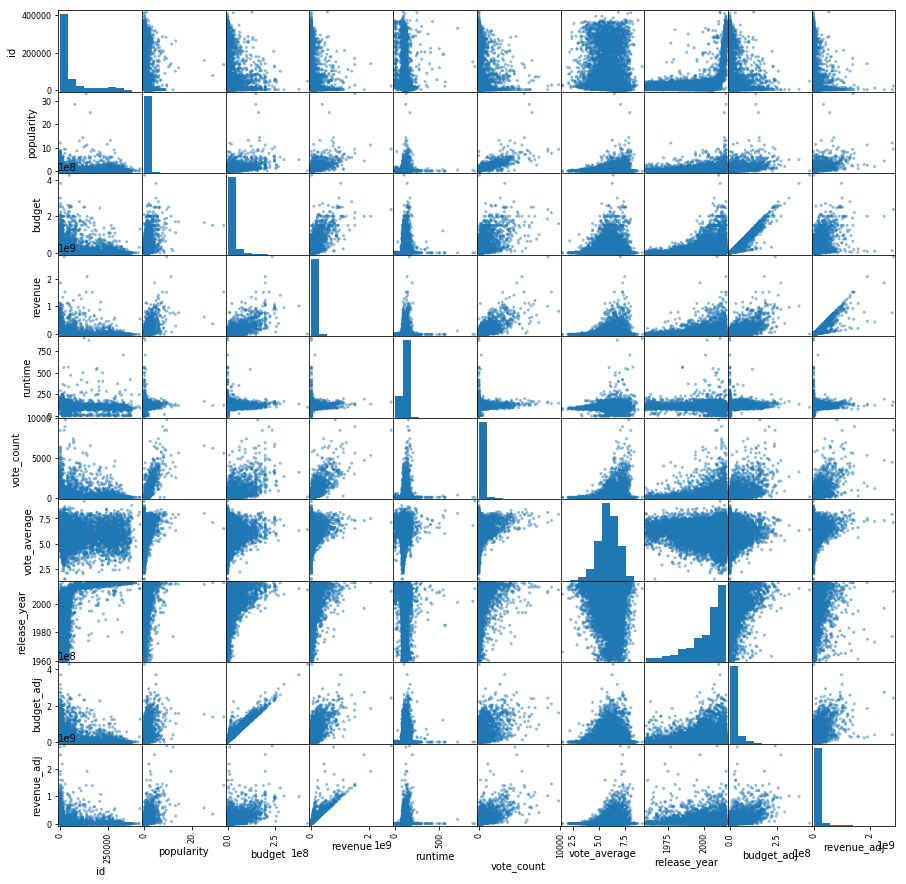

In [120]:
pd.plotting.scatter_matrix(df, figsize = (15,15));

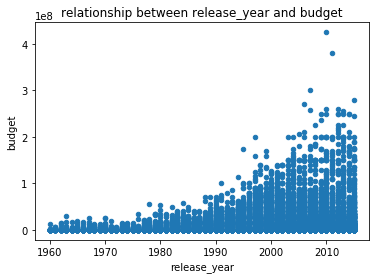

In [121]:
# plot relationship between release_year and budget output
df.plot(x='release_year', y= 'budget', kind = 'scatter',title = 'relationship between release_year and budget');

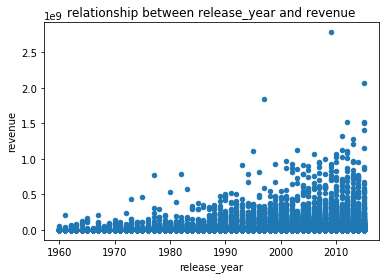

In [122]:
# plot relationship between release_year and revenue output
df.plot(x='release_year', y= 'revenue', kind = 'scatter',title = 'relationship between release_year and revenue');

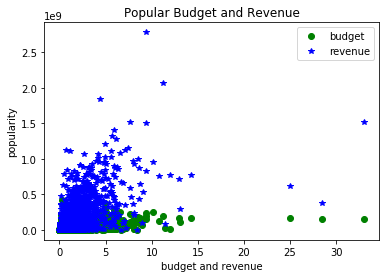

In [123]:

plt.plot(df.popularity, df.budget, 'go', label='budget')
plt.plot(df.popularity, df.revenue, 'b*', label='revenue')
plt.title('Popular Budget and Revenue')
plt.xlabel('budget and revenue')
plt.ylabel('popularity')
plt.legend(loc='best')  # legend text comes from the plot's label parameter.
plt.show()

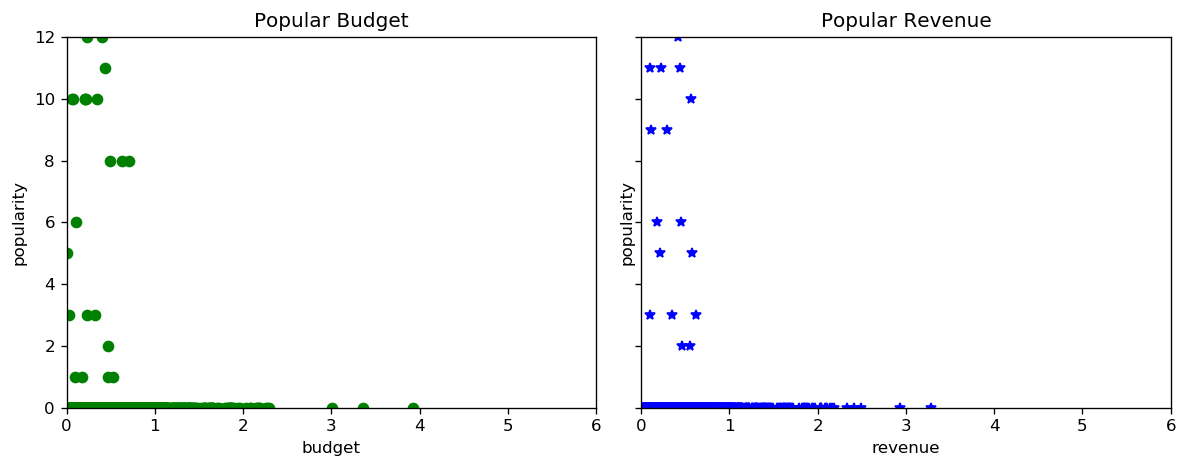

In [124]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(df.popularity, df.budget, 'go')  # greendots
ax2.plot(df.popularity, df.revenue, 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Popular Budget'); ax2.set_title('Popular Revenue')
ax1.set_xlabel('budget');  ax2.set_xlabel('revenue')  # x label
ax1.set_ylabel('popularity');  ax2.set_ylabel('popularity')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

### Question 1 Which genres are most popular from year to year? 

We will split the genres string.

In [125]:
# split the genres string
df['genres'] = df['genres'].str.split('|')

We will create genre list( create each row for each gen) using explode.

In [126]:
# create genre list( create each row for each gen) using explode 
df = df.explode('genres')
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [127]:
# groupby year again and get the largest value
df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)


release_year  release_year  genres         
1960          1960          Thriller           0.811910
1961          1961          Animation          2.631987
1962          1962          Adventure          0.942513
1963          1963          Animation          2.180410
1964          1964          War                0.930959
1965          1965          Music              0.968850
1966          1966          Animation          0.585717
1967          1967          Animation          2.550704
1968          1968          Mystery            1.519456
1969          1969          Crime              0.948020
1970          1970          Animation          1.127718
1971          1971          Family             1.530722
1972          1972          Crime              1.072768
1973          1973          Animation          0.956526
1974          1974          Mystery            0.702035
1975          1975          Adventure          0.880297
1976          1976          Crime              0.707249
1977

In [128]:
# tidy up the data by removing extra row index by reset index
data = df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)


In [129]:
# change the pandas series to pandas dataframe
data = data.reset_index()

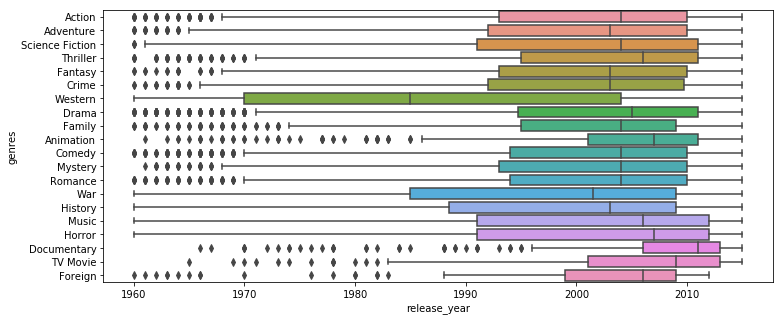

In [130]:
plt.figure(figsize=(12, 5)) 
sns.boxplot(x= df.release_year, y= df.genres);

In [131]:
df.genres.value_counts()

Drama              4752
Comedy             3785
Thriller           2905
Action             2381
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Science Fiction    1227
Family             1219
Fantasy             911
Mystery             809
Animation           669
Documentary         478
Music               405
History             331
War                 268
Foreign             187
TV Movie            167
Western             165
Name: genres, dtype: int64

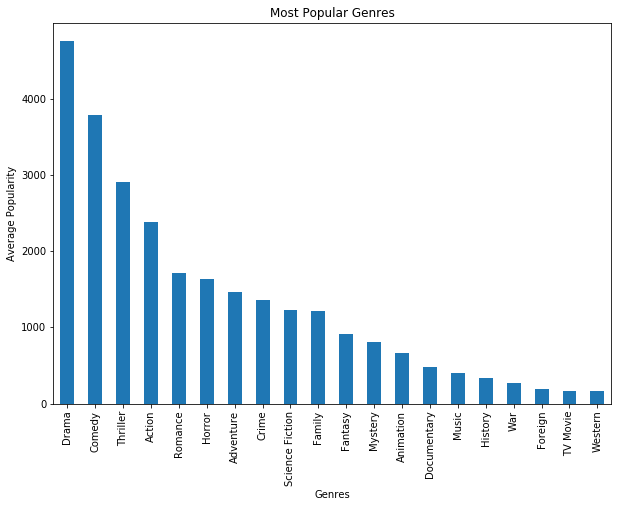

In [132]:
#plot Top 10 popularity Movies
df['genres'].value_counts().plot(kind='bar',title = 'Most Popular Genres', figsize = (10,7));
plt.xlabel('Genres')
plt.ylabel('Average Popularity');

The most popular from year to year is 'Drama', followed by 'Comedy', and 'Western ' films are the least represented.

In [133]:
#Top 10 popularity Movies
mov_popularity = df.groupby('original_title').popularity.mean().sort_values(ascending=False)
mov_popularity.head(10)

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

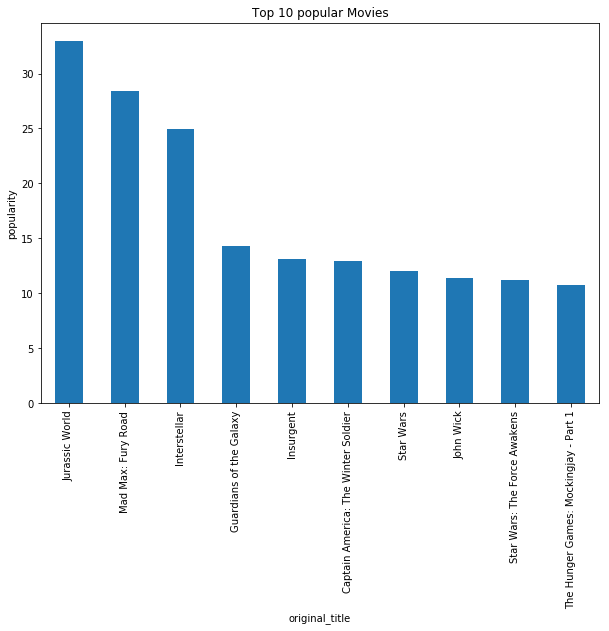

In [134]:
mov_popularity.head(10).plot(kind = 'bar', title = 'Top 10 popular Movies', figsize = (10,7));
plt.ylabel('popularity');

We can see the top 10 popularity Movies movies.

### Question 2  What kinds of properties are associated with movies that have high revenues?

In [135]:
df["release_date"] = pd.to_datetime(df["release_date"])

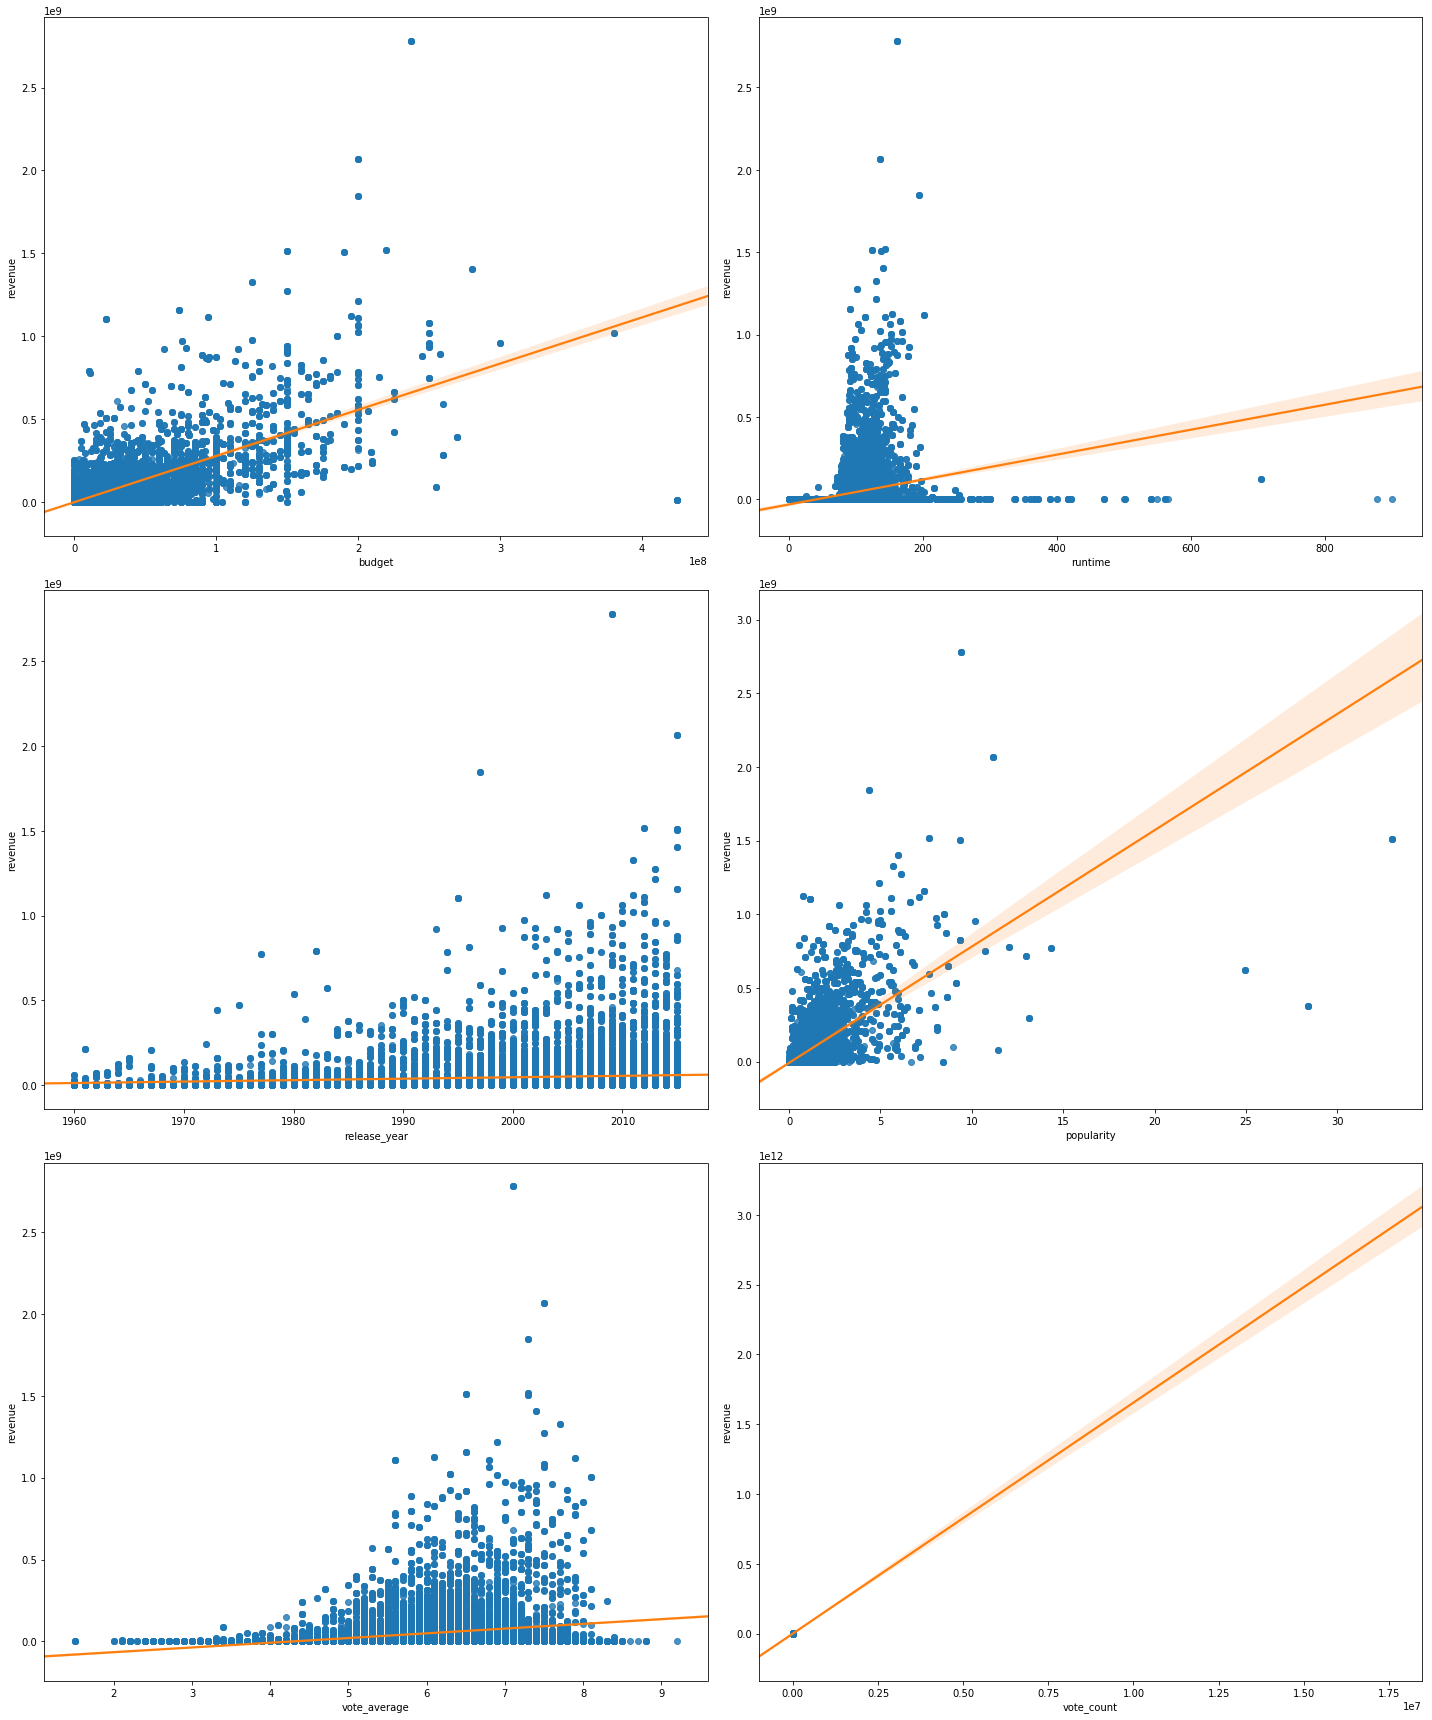

In [136]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 24))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(x="budget", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][0])
sns.regplot(x="runtime", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][1])
sns.regplot(x="release_year", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][0])
sns.regplot(x="popularity", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][1])
sns.regplot(x="vote_average", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][0])
sns.regplot(x="vote_count", y="revenue", data=df, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][1])
fig.tight_layout()

There is a pronounced correlation between film budget and revenue, with films with higher production costs generally collecting more revenue. The more revenue films accumulate also to correlate with their popularity score and the number of votes it receives.

## Conclusions


- The most popular from year to year is 'Drama', followed by 'Comedy', and 'Western ' films are the least represented.
- The Top 1 genre: Drama.
- The Top 1 popular Movie: Jurassic World.
- Revenue is positive directly connected to the budget. we can do more use of inferential statistics may be necessary to arrive at a suitable conclusion.


### Limitations


 - There is many of information removed such as rows containing 0 values and null values. The dataset was cut by a few thousand rows of movies, which would definitely affect the result.
 - I split the data separated by '|' into lists for easy exploration. it is taken time in calculating the result.




